## Reading in packages, loading in data

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, \
                            classification_report, precision_recall_curve, log_loss
from sklearn import metrics

In [4]:
spotify_df = pd.read_csv('spotifytracks.csv')

In [5]:
spotify_df.drop(['genre', 'Unnamed: 0'], axis=1, inplace=True)

In [6]:
spotify_df

,track_name,album,artist,release_date,length,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,target
0,One More Year,The Slow Rush,Tame Impala,2020-02-14,324013,59,0.602,0.880,1,-5.414,1,0.0354,0.0570,0.460000,0.2840,0.493,114.009,4,1
1,Vámonos de Viaje,BACH,Bandalos Chinos,2018-08-03,235866,2,0.766,0.749,5,-6.147,1,0.0303,0.0249,0.002150,0.3550,0.889,129.010,4,1
2,Sofia,Immunity,Clairo,2019-08-02,188386,83,0.744,0.619,0,-9.805,1,0.0390,0.5980,0.003720,0.2310,0.641,112.997,4,1
3,Sadnecessary,Sadnecessary,Milky Chance,2013-05-31,298000,51,0.757,0.542,9,-10.674,1,0.0775,0.7960,0.019600,0.2650,0.466,107.988,4,1
4,Closedloop,Boomerang EP,Elliot Moss,2017-04-28,280689,37,0.803,0.420,7,-10.220,0,0.0432,0.2560,0.112000,0.0703,0.493,130.031,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,The Theme - Take 1,Workin',Miles Davis Quintet,1959,118146,33,0.473,0.427,10,-10.742,0,0.0406,0.5210,0.001340,0.5530,0.444,137.139,4,0
10136,Trane's Blues,Workin',Miles Davis Quintet,1959,512146,37,0.554,0.445,0,-10.211,0,0.0385,0.6740,0.000011,0.0926,0.498,80.505,4,0
10137,Ahmad's Blues,Workin',Miles Davis Quintet,1959,444226,34,0.554,0.412,6,-14.048,1,0.0495,0.5040,0.534000,0.1660,0.457,116.631,4,0
10138,Half Nelson,Workin',Miles Davis Quintet,1959,285040,29,0.521,0.726,0,-7.266,1,0.1210,0.7390,0.000877,0.1460,0.712,128.432,4,0


## Train-Val-Test split, scaling data

In [7]:
X = np.array(spotify_df.iloc[:, 4:-1])
y = np.array(spotify_df.target)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=777)

# Random Forest

## Train and Val scores

In [7]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_train_pred = randomforest.predict(X_train)
y_val_pred = randomforest.predict(X_val)

In [9]:
accuracy = metrics.accuracy_score(y_train, y_train_pred)
precision = metrics.precision_score(y_train, y_train_pred)
recall = metrics.recall_score(y_train, y_train_pred)
f1 = metrics.f1_score(y_train, y_train_pred)

print("Training Set Accuracy:" , round(accuracy, 3))
print("Training Set Precision:", round(precision, 3))
print("Training Set Recall:", round(recall, 3))
print("Training Set F1 Score:", round(f1, 3))

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0


In [10]:
accuracy = metrics.accuracy_score(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred)
recall = metrics.recall_score(y_val, y_val_pred)
f1 = metrics.f1_score(y_val, y_val_pred)

print("Val Set Accuracy:" , round(accuracy, 3))
print("Val Set Precision:", round(precision, 3))
print("Val Set Recall:", round(recall, 3))
print("Val Set F1 Score:", round(f1, 3))

Val Set Accuracy: 0.919
Val Set Precision: 0.928
Val Set Recall: 0.911
Val Set F1 Score: 0.919


## Precision/Recall Curve

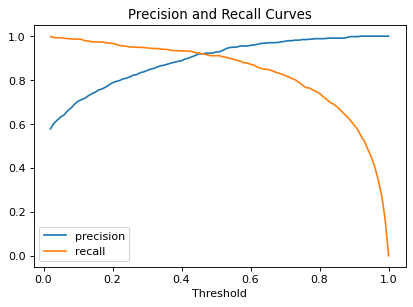

In [11]:
precision_curve, recall_curve, threshold_curve = \
        precision_recall_curve(y_val, randomforest.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

## Confusion Matrix, ROC AUC plot

In [12]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    genre_matrix = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(genre_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock'],
           yticklabels=['jazz', 'rock']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       804
           1       0.92      0.91      0.92       819

    accuracy                           0.92      1623
   macro avg       0.92      0.92      0.92      1623
weighted avg       0.92      0.92      0.92      1623



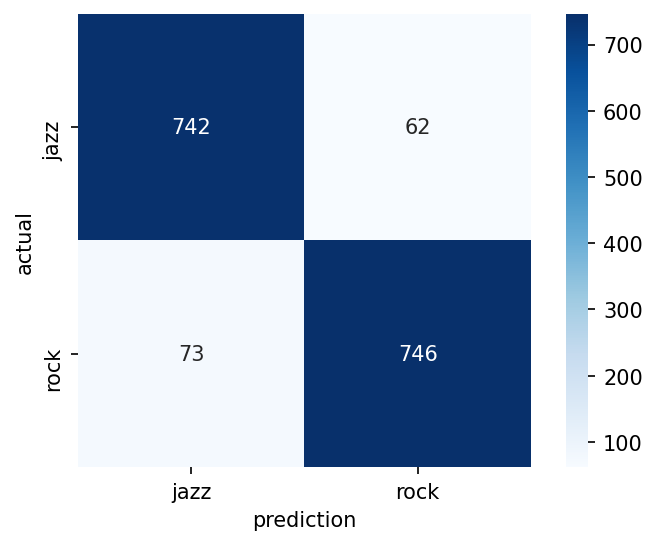

In [13]:
make_confusion_matrix(randomforest)

In [14]:
fpr, tpr, thresholds = roc_curve(y_val, randomforest.predict_proba(X_val)[:,1])

ROC AUC score =  0.9705334742648176


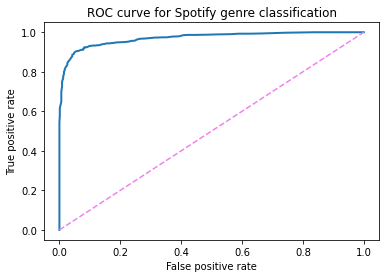

In [15]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Spotify genre classification');

print("ROC AUC score = ", roc_auc_score(y_val, randomforest.predict_proba(X_val)[:,1]))

## Log Loss

In [16]:
print("Log-loss on random forest: {:6.4f}".format(log_loss(y_val, randomforest.predict_proba(X_val))))

Log-loss on random forest: 0.2271


## Feature Importance

In [43]:
pd.DataFrame({'col_name': randomforest.feature_importances_}, index=X_val_df.columns).sort_values(by='col_name', ascending=False)


,col_name
acousticness,0.228250
energy,0.169043
loudness,0.137870
popularity,0.102468
instrumentalness,0.099307
length,0.051569
speechiness,0.045881
danceability,0.041051
tempo,0.035465
valence,0.033304


# Random Forest with Polynomial Features
## This was unnecessary 

In [10]:
poly = PolynomialFeatures(interaction_only=True)

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [11]:
poly_feature_interactions = poly.get_feature_names(['length', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'])

In [12]:
poly_feature_interactions

['1',
 'length',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'length popularity',
 'length danceability',
 'length energy',
 'length key',
 'length loudness',
 'length mode',
 'length speechiness',
 'length acousticness',
 'length instrumentalness',
 'length liveness',
 'length valence',
 'length tempo',
 'length time_signature',
 'popularity danceability',
 'popularity energy',
 'popularity key',
 'popularity loudness',
 'popularity mode',
 'popularity speechiness',
 'popularity acousticness',
 'popularity instrumentalness',
 'popularity liveness',
 'popularity valence',
 'popularity tempo',
 'popularity time_signature',
 'danceability energy',
 'danceability key',
 'danceability loudness',
 'danceability mode',
 'danceability speechiness',
 'danceability acousticness',
 'danceability instrumentalness',
 'danceability liveness',
 'danceability valen

In [13]:
rf_poly = RandomForestClassifier(n_estimators=100)

In [14]:
rf_poly.fit(X_train_poly, y_train)

RandomForestClassifier()

In [15]:
y_train_poly_pred = rf_poly.predict(X_train_poly)
y_val_poly_pred = rf_poly.predict(X_val_poly)

## Train and Val Scores

In [16]:
accuracy = metrics.accuracy_score(y_train, y_train_poly_pred)
precision = metrics.precision_score(y_train, y_train_poly_pred)
recall = metrics.recall_score(y_train, y_train_poly_pred)
f1 = metrics.f1_score(y_train, y_train_poly_pred)

print("Training Set Accuracy:" , round(accuracy, 3))
print("Training Set Precision:", round(precision, 3))
print("Training Set Recall:", round(recall, 3))
print("Training Set F1 Score:", round(f1, 3))

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0


In [17]:
accuracy = metrics.accuracy_score(y_val, y_val_poly_pred)
precision = metrics.precision_score(y_val, y_val_poly_pred)
recall = metrics.recall_score(y_val, y_val_poly_pred)
f1 = metrics.f1_score(y_val, y_val_poly_pred)

print("Val Set Accuracy:" , round(accuracy, 3))
print("Val Set Precision:", round(precision, 3))
print("Val Set Recall:", round(recall, 3))
print("Val Set F1 Score:", round(f1, 3))

Val Set Accuracy: 0.921
Val Set Precision: 0.934
Val Set Recall: 0.908
Val Set F1 Score: 0.921


## Precision/Recall Curve

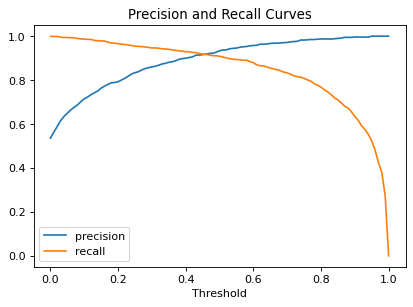

In [18]:
precision_curve, recall_curve, threshold_curve = \
        precision_recall_curve(y_val, rf_poly.predict_proba(X_val_poly)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

## Confusion Matrix, ROC AUC plot

In [19]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_val_poly)[:, 1] >= threshold)
    genre_matrix = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(genre_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock'],
           yticklabels=['jazz', 'rock']);
    plt.xlabel('Predicted genres')
    plt.ylabel('Actual genres')
    plt.title('Random Forest confusion matrix')
    print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       804
           1       0.93      0.91      0.92       819

    accuracy                           0.92      1623
   macro avg       0.92      0.92      0.92      1623
weighted avg       0.92      0.92      0.92      1623



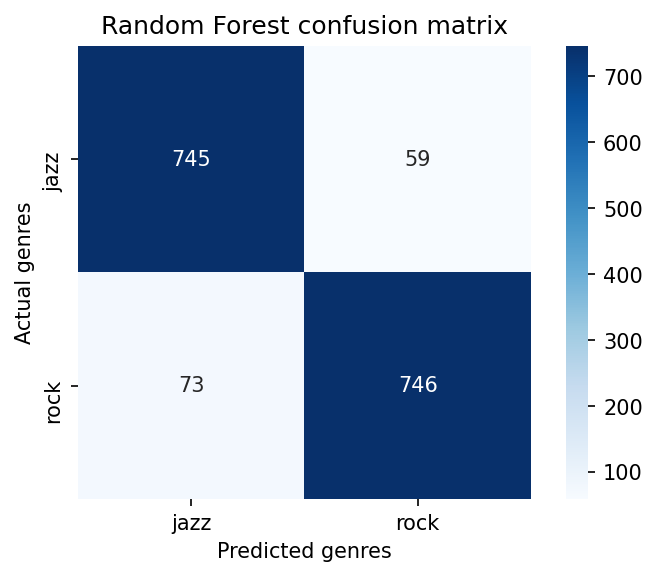

In [20]:
make_confusion_matrix(rf_poly)

In [27]:
fpr, tpr, thresholds = roc_curve(y_val, rf_poly.predict_proba(X_val_poly)[:,1])

ROC AUC score =  0.9717833299922853


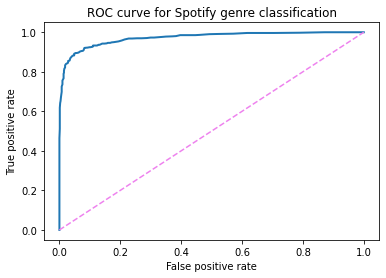

In [28]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Spotify genre classification');

print("ROC AUC score = ", roc_auc_score(y_val, rf_poly.predict_proba(X_val_poly)[:,1]))

## Log Loss

In [29]:
print("Log-loss on random forest with feature interaction: {:6.4f}" \
      .format(log_loss(y_val, rf_poly.predict_proba(X_val_poly))))

Log-loss on random forest with feature interaction: 0.2173


## Feature Importance

In [44]:
pd.DataFrame({'col_name': rf_poly.feature_importances_}, index=X_val_poly_df.columns) \
            .sort_values(by='col_name', ascending=False)

,col_name
acousticness time_signature,0.061381
length acousticness,0.060368
acousticness,0.059889
loudness acousticness,0.057362
acousticness tempo,0.036609
...,...
key time_signature,0.001344
mode time_signature,0.000982
mode,0.000429
time_signature,0.000273
